<a href="https://colab.research.google.com/github/esn73/lab_python/blob/master/py26_apt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   [apt_201910.csv](https://github.com/JakeOh/202105_itw_bd26/raw/main/datasets/apt_201910.csv) 파일을 읽고 DataFrame 생성
    *   encoding 파라미터 설정
    *   '가격' 컬럼에는 숫자 자릿수를 구분하는 comma가 사용되고 있음(예: 10,000)
        *   '가격' 컬럼은 숫자 타입이어야 함!
*   데이터 프레임 파악
    *   info, head, tail, describe, dtypes, ...
*   '시군구' 컬럼의 값을 이용해서, 'province' 파생 변수(도, 광역시 이름) 만듦.
    *   '강원도 강릉시 견소동' -> '강원도'
*   '계약년월' 컬럼의 값을 이용해서, 'year(계약년도)', 'month(계약월)' 파생 변수 만듦.
    *   201910 -> 2019, 10
*    서울특별시 아파트들의 동별 아파트 가격의 개수, 평균, 최솟값, 최댓값
*    도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
*    면적이  $84 m^2$  이상  $100 m^2$  미만의 서울특별시 아파트들 중에서, 동별 아파트 가격 개수, 평균, 최솟값, 최댓값
*    면적이 $84 m^2$ 이상 $100 m^2$ 미만의 아파트들 중에서, 도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
    *   결과를 평균의 내림차순으로 정렬해서 출력
    *   결과를 최댓값의 내림차순으로 정렬해서 출력
    *   결과를 최솟값의 오름차순으로 정렬해서 출력

# Step 1: Colab에 한글 폰트 설치하기

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


# Step 2: Colab 런타임 재시작

가상머신 재부팅 과장

# Step3: matplotlib 폰트를  Nanum 폰트로 지정

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.DataFrame(data={'구':['강남구', '서초구'],'가격':[100,150]})
df

,구,가격
0,강남구,100
1,서초구,150


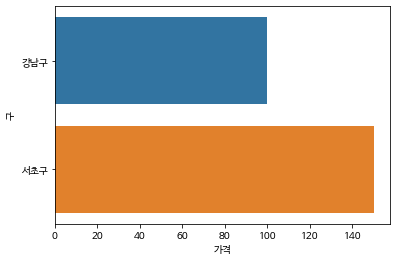

In [ ]:
sns.barplot(x='가격', y='구', data=df)
plt.show()

# ■ 아파트 매매 가격 분석

In [ ]:
# CSV 파일이 저장된 경로
apt_file='https://raw.githubusercontent.com/JakeOh/202105_itw_bd26/main/datasets/apt_201910.csv' #국토교통부

In [ ]:
# CSV 파일을 읽고 DataFrame 생성
apt = pd.read_csv(apt_file, engine='python', encoding='CP949', thousands = ',') 
# thousands = ',': 숫자의 1000자리 구분자로 ','가 사용됨.
apt.head()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22


파일 인코딩 타입

* utf-8: Linux, MaxOS 등 대부분의 OS에서 텍스트의 기본 인코딩
* cp949: 한글 MS-Windows에서 텍스트의 기본 인코딩
* cp1252: 영문 MS-Windows에서 텍스트의 기본 인코딩 

In [ ]:
apt.dtypes

시군구      object
번지       object
본번       object
부번        int64
단지명      object
면적      float64
계약년월      int64
계약일       int64
가격       object
층         int64
건축년도      int64
도로명      object
dtype: object

In [ ]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42758 entries, 0 to 42757
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구     42758 non-null  object 
 1   번지      42758 non-null  object 
 2   본번      42758 non-null  object 
 3   부번      42758 non-null  int64  
 4   단지명     42758 non-null  object 
 5   면적      42758 non-null  float64
 6   계약년월    42758 non-null  int64  
 7   계약일     42758 non-null  int64  
 8   가격      42758 non-null  int64  
 9   층       42758 non-null  int64  
 10  건축년도    42758 non-null  int64  
 11  도로명     42758 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 3.9+ MB


In [ ]:
apt.describe()

,부번,면적,계약년월,계약일,층,건축년도
count,42758.000000,42758.000000,42758.0,42758.000000,42758.000000,42758.000000
mean,4.257051,75.990614,201910.0,14.246410,9.614575,2002.652252
std,35.928135,24.816118,0.0,8.678427,6.582509,9.716009
min,0.000000,10.020000,201910.0,1.000000,-1.000000,1962.000000
25%,0.000000,59.820000,201910.0,7.000000,4.000000,1995.000000
50%,0.000000,82.536900,201910.0,14.000000,9.000000,2003.000000
75%,1.000000,84.961200,201910.0,21.000000,13.000000,2011.000000
max,2269.000000,291.336000,201910.0,31.000000,70.000000,2019.000000


In [ ]:
apt.tail()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
42753,충청북도 충주시 호암동,547-6,547,6,호반현대,59.76,201910,29,"7,000",3,1994,신촌2길 28
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,5,"12,000",15,2002,원호암5길 32
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,15,"11,000",7,2002,원호암5길 32
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,17,"12,000",14,2002,원호암5길 32
42757,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,26,"11,200",11,2002,원호암5길 32


## 숫자 타입 변수들 기술 통계량

In [30]:
apt[['면적','가격','층', '건축년도']].describe()

,면적,가격,층,건축년도
count,42758.000000,42758.000000,42758.000000,42758.000000
mean,75.990614,31719.163946,9.614575,2002.652252
std,24.816118,26001.893045,6.582509,9.716009
min,10.020000,600.000000,-1.000000,1962.000000
25%,59.820000,15500.000000,4.000000,1995.000000
50%,82.536900,25400.000000,9.000000,2003.000000
75%,84.961200,40000.000000,13.000000,2011.000000
max,291.336000,485000.000000,70.000000,2019.000000


## 기술 통계량 시각화

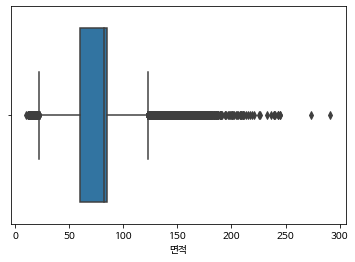

In [37]:
# 아파트 면적 시각화 - 연속형은 주로 box,histogram
sns.boxplot(x='면적', data=apt)
plt.show()

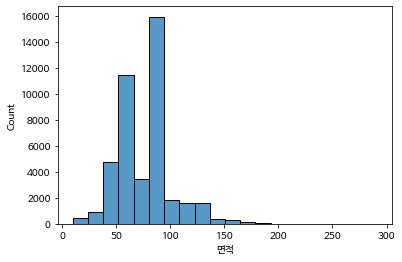

In [36]:
# 히스토그램
sns.histplot(x='면적', data=apt, bins=20)
plt.show()

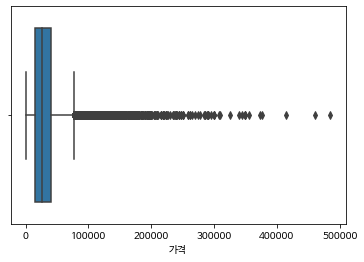

In [38]:
# 가격 시각화
sns.boxplot(x='가격', data=apt)
plt.show()

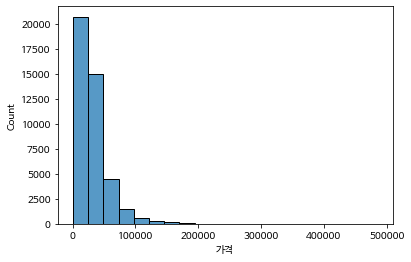

In [40]:
sns.histplot(x='가격', data=apt, bins=20)
plt.show()

## 파생 변수 추가
* province: 광역시도
* year: 매매 연도
* month: 매매 월

In [42]:
#'시군구' 컬럼의 값을 이용해서, 'province' 파생 변수(도, 광역시 이름) 만듦.
    #'강원도 강릉시 견소동' -> '강원도'

# 리뷰
apt['province'] = apt['시군구'].str.split().str[0]
# apt['province'] = apt['시군구'].str.split(' ', expand=True)[0]
apt.head()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8,강원도
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8,강원도
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22,강원도
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22,강원도
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22,강원도


In [43]:
apt['province'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [44]:
province_counts = apt['province'].value_counts()

경기도        12126
서울특별시       4701
경상남도        2955
인천광역시       2761
부산광역시       2752
대전광역시       2487
충청남도        2045
경상북도        1985
대구광역시       1969
광주광역시       1588
충청북도        1576
울산광역시       1562
전라북도        1394
전라남도        1234
강원도         1143
세종특별자치시      315
제주특별자치도      165
Name: province, dtype: int64

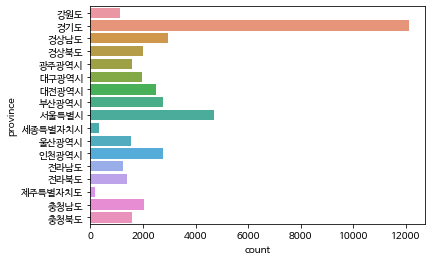

In [47]:
sns.countplot(y='province', data=apt)
plt.show()

In [ ]:
apt.tail()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province
42753,충청북도 충주시 호암동,547-6,547,6,호반현대,59.76,201910,29,"7,000",3,1994,신촌2길 28,충청북도
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,5,"12,000",15,2002,원호암5길 32,충청북도
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,15,"11,000",7,2002,원호암5길 32,충청북도
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,17,"12,000",14,2002,원호암5길 32,충청북도
42757,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,26,"11,200",11,2002,원호암5길 32,충청북도


In [ ]:
#  '계약년월' 컬럼의 값을 이용해서, 'year(계약년도)', 'month(계약월)' 파생 변수 만듦.
    #  201910 -> 2019, 10
apt['계약년월'] = apt['계약년월'].astype('str')
apt.dtypes

시군구          object
번지           object
본번           object
부번            int64
단지명          object
면적          float64
계약년월         object
계약일           int64
가격           object
층             int64
건축년도          int64
도로명          object
province     object
dtype: object

In [ ]:
apt['계약년월'].str[:4]

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
42753    2019
42754    2019
42755    2019
42756    2019
42757    2019
Name: 계약년월, Length: 42758, dtype: object

In [ ]:
apt['year(계약년도)']= apt['계약년월'].str[:4]
apt.head()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,year(계약년도)
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,"10,900",5,1997,경강로2539번길 8,강원도,2019
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,"18,500",10,1997,경강로2539번길 8,강원도,2019
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,"25,000",6,2005,경강로2539번길 22,강원도,2019
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,"20,600",3,2005,경강로2539번길 22,강원도,2019
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,"20,500",1,2005,경강로2539번길 22,강원도,2019


In [ ]:
apt['month(계약월)']= apt['계약년월'].str[-2:]
apt.head()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,year(계약년도),month(계약월)
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,"10,900",5,1997,경강로2539번길 8,강원도,2019,10
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,"18,500",10,1997,경강로2539번길 8,강원도,2019,10
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,"25,000",6,2005,경강로2539번길 22,강원도,2019,10
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,"20,600",3,2005,경강로2539번길 22,강원도,2019,10
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,"20,500",1,2005,경강로2539번길 22,강원도,2019,10


In [50]:
# 서울특별시 아파트들의 동별 아파트 가격의 개수, 평균, 최솟값, 최댓값
    # 시군구 파생 변수
apt['county'] = apt['시군구'].str.split().str[1] # 시 파생병송

In [53]:
apt['dong']= apt['시군구'].str.split().str[2] # 동 파생변수 생성
apt.head()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,county,dong
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8,강원도,강릉시,견소동
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8,강원도,강릉시,견소동
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22,강원도,강릉시,견소동
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22,강원도,강릉시,견소동
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22,강원도,강릉시,견소동


In [55]:
apt['dong'].unique()

array(['견소동', '교동', '남문동', ..., '지현동', '칠금동', '호암동'], dtype=object)

In [56]:
apt['year'] = apt['계약년월'] // 100 # 몫
apt['month']= apt['계약년월'] % 100 # 나머지
apt.head()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,county,dong,year,month
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8,강원도,강릉시,견소동,2019,10
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8,강원도,강릉시,견소동,2019,10
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22,강원도,강릉시,견소동,2019,10
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22,강원도,강릉시,견소동,2019,10
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22,강원도,강릉시,견소동,2019,10


In [57]:
apt['year'].unique()

array([2019])

In [58]:
apt['month'].unique()

array([10])

## 광역시도별 분석

In [72]:
# 도/광역시도별 아파트 매매가격의 개수, 평균, 최솟값, 최댓값
result = apt.groupby(by='province')['가격'].agg(['count', 'mean', 'min', 'max'])

In [73]:
# 결과를 매매가격 평균의 내림차순 정렬
top10 = result.sort_values(by='mean', ascending=False).head(n=10)
top10

,count,mean,min,max
province,,,,
서울특별시,4701,69302.919166,8500,485000
경기도,12126,36447.593765,2700,262000
세종특별자치시,315,33577.206349,2880,82200
인천광역시,2761,30196.960884,4000,300000
부산광역시,2752,29593.587209,1500,376640
대구광역시,1969,28031.251397,1500,173500
대전광역시,2487,27591.418979,2400,150000
울산광역시,1562,26581.768246,4000,81000
제주특별자치도,165,25878.181818,6000,76500


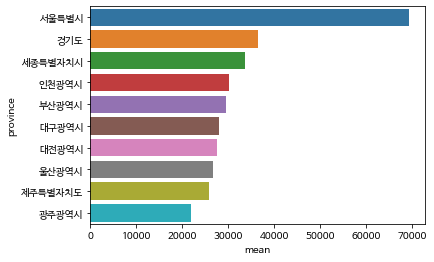

In [65]:
sns.barplot(x='mean', y=top10.index, data=top10)
plt.show()

In [77]:
top10_max = result.sort_values(by='max', ascending=False).head(n=10)
top10_max 

,count,mean,min,max
province,,,,
서울특별시,4701,69302.919166,8500,485000
부산광역시,2752,29593.587209,1500,376640
인천광역시,2761,30196.960884,4000,300000
경기도,12126,36447.593765,2700,262000
대구광역시,1969,28031.251397,1500,173500
대전광역시,2487,27591.418979,2400,150000
광주광역시,1588,21786.904282,4150,115000
충청북도,1576,18068.494289,1100,96000
충청남도,2045,17494.407824,1500,90000


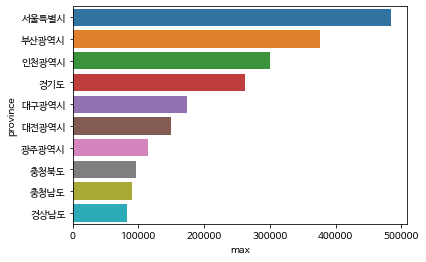

In [80]:
sns.barplot(x='max', y=top10_max.index, data=top10_max)
plt.show()

In [83]:
bottom10_min = result.sort_values(by='min').head(n=10) # 기본값 ascending=True 오름차순 정렬
bottom10_min

,count,mean,min,max
province,,,,
경상북도,1985,15304.175819,600,50000
전라북도,1394,14655.274032,900,68700
강원도,1143,14305.559930,950,45800
충청북도,1576,18068.494289,1100,96000
전라남도,1234,14523.552674,1330,61800
대구광역시,1969,28031.251397,1500,173500
부산광역시,2752,29593.587209,1500,376640
충청남도,2045,17494.407824,1500,90000
대전광역시,2487,27591.418979,2400,150000


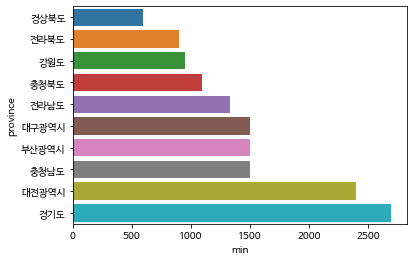

In [84]:
sns.barplot(x='min', y=bottom10_min.index, data=bottom10_min)
plt.show()

In [ ]:
# 면적이  84m2  이상  100m2  미만의 서울특별시 아파트들 중에서, 동별 아파트 가격 개수, 평균, 최솟값, 최댓값
# 면적이  84m2  이상  100m2  미만의 아파트들 중에서, 도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
# 결과를 평균의 내림차순으로 정렬해서 출력
# 결과를 최댓값의 내림차순으로 정렬해서 출력
# 결과를 최솟값의 오름차순으로 정렬해서 출력